# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [2]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [3]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [4]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [5]:
print(f"Row and Columns: {df_apps.shape}")

Row and Columns: (10841, 12)


In [6]:
print(f"Columns names: {df_apps.columns}")

Columns names: Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')


In [7]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
7902,Magnum 3.0 Gun Custom SImulator,GAME,4.50,16815,59.00,"1,000,000",Free,0,Teen,Action,"August 4, 2018",4.0.3 and up
4129,EZ Inspections,PRODUCTIVITY,2.80,160,7.60,"10,000",Free,0,Everyone,Productivity,"July 27, 2018",4.2 and up
2709,DN Sync,NEWS_AND_MAGAZINES,4.10,56,0.03,"1,000",Free,0,Everyone 10+,News & Magazines,"June 13, 2016",2.3.3 and up
10107,YouTube Kids,FAMILY,4.50,469851,19.00,"50,000,000",Free,0,Everyone,Entertainment;Music & Video,"August 3, 2018",4.1 and up
3378,Make a burger king,FAMILY,3.80,125,17.00,"10,000",Free,0,Everyone,Casual,"February 21, 2017",4.0 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [8]:
# df_apps = df_apps.drop(columns=['Last_Updated', 'Android_Ver'])
print(df_apps.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [9]:
print(df_apps.isna().sum())
df_apps_clean = df_apps.dropna()
#print(df_apps_clean)
print(df_apps_clean.isna().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Android_Ver          2
dtype: int64
App               0
Category          0
Rating            0
Reviews           0
Size_MBs          0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Android_Ver       0
dtype: int64


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [10]:
df_apps_clean.duplicated().sum()

474

In [11]:
df_apps_clean = df_apps_clean.drop_duplicates()

In [12]:
df_apps_clean.duplicated().sum()

0

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [13]:
highest_rated_apps = df_apps_clean.sort_values(ascending=False, by='Rating')
print(highest_rated_apps.head())

                      App            Category  Rating  Reviews  Size_MBs  \
21    KBA-EZ Health Guide             MEDICAL    5.00        4     25.00   
1573       FHR 5-Tier 2.0             MEDICAL    5.00        2      1.20   
1096             BG Guide    TRAVEL_AND_LOCAL    5.00        3      2.40   
1095         Morse Player              FAMILY    5.00       12      2.40   
1092                DG TV  NEWS_AND_MAGAZINES    5.00        3      5.70   

     Installs  Type  Price Content_Rating            Genres  \
21          1  Free      0       Everyone           Medical   
1573      500  Paid  $2.99       Everyone           Medical   
1096      100  Free      0       Everyone    Travel & Local   
1095      100  Paid  $1.99       Everyone         Education   
1092      100  Free      0       Everyone  News & Magazines   

           Last_Updated   Android_Ver  
21       August 2, 2018  4.0.3 and up  
1573  December 16, 2015    4.0 and up  
1096  November 28, 2016  2.3.3 and up  
1095

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [14]:
largest_size_apps = df_apps_clean.sort_values(ascending=False, by='Size_MBs')
print(largest_size_apps.head())

                                App Category  Rating  Reviews  Size_MBs  \
8719     Draft Simulator for FUT 18   SPORTS    4.60   162933    100.00   
9943          Miami crime simulator     GAME    4.00   254518    100.00   
7926                      Post Bank  FINANCE    4.50    60449    100.00   
7927    The Walking Dead: Our World     GAME    4.00    22435    100.00   
7928  Stickman Legends: Shadow Wars     GAME    4.40    38419    100.00   

        Installs  Type  Price Content_Rating   Genres    Last_Updated  \
8719   5,000,000  Free      0       Everyone   Sports    May 11, 2018   
9943  10,000,000  Free      0     Mature 17+   Action    July 9, 2018   
7926   1,000,000  Free      0       Everyone  Finance   July 23, 2018   
7927   1,000,000  Free      0           Teen   Action  August 1, 2018   
7928   1,000,000  Paid  $0.99   Everyone 10+   Action  August 3, 2018   

     Android_Ver  
8719  4.1 and up  
9943  4.0 and up  
7926  4.0 and up  
7927  5.0 and up  
7928  4.1 and u

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [15]:
most_reviews_apps = df_apps_clean.sort_values(ascending=False, by='Reviews')
print(most_reviews_apps.head())

                      App       Category  Rating   Reviews  Size_MBs  \
10805            Facebook         SOCIAL    4.10  78158306      5.30   
10811            Facebook         SOCIAL    4.10  78128208      5.30   
10785  WhatsApp Messenger  COMMUNICATION    4.40  69119316      3.50   
10797  WhatsApp Messenger  COMMUNICATION    4.40  69109672      3.50   
10808           Instagram         SOCIAL    4.50  66577446      5.30   

            Installs  Type Price Content_Rating         Genres  \
10805  1,000,000,000  Free     0           Teen         Social   
10811  1,000,000,000  Free     0           Teen         Social   
10785  1,000,000,000  Free     0       Everyone  Communication   
10797  1,000,000,000  Free     0       Everyone  Communication   
10808  1,000,000,000  Free     0           Teen         Social   

         Last_Updated         Android_Ver  
10805  August 3, 2018  Varies with device  
10811  August 3, 2018  Varies with device  
10785  August 3, 2018  Varies with dev

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [16]:
ratings = df_apps_clean['Content_Rating'].value_counts()
print(ratings)

Everyone           7094
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64


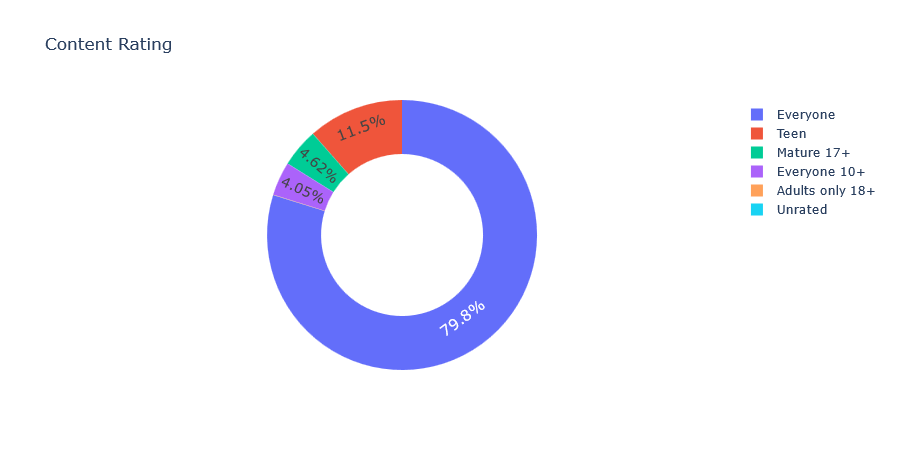

In [20]:
fig = px.pie(labels=ratings.index, values=ratings.values, title='Content Rating', names=ratings.index, hole=0.6)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [47]:
df_apps_clean['Installs'].describe()

count          8891
unique           19
top       1,000,000
freq           1486
Name: Installs, dtype: object

In [48]:
    df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")
    df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
    df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,426
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [51]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",4.1 and up
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",4.0.3 and up
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",4.4 and up
1331,most expensive app (H),FAMILY,4.30,6,1.50,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",7.0 and up
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.6 and up
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",4.2 and up
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",4.1 and up
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",4.4 and up
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",4.0 and up
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance,"December 6, 2017",4.0.3 and up


### The most expensive apps sub $250

In [52]:
    df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
    df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",4.0.3 and up
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical,"April 4, 2018",4.1 and up
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",4.0.3 and up
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",4.0 and up
2207,EMT PASS,MEDICAL,3.40,51,2.40,1000,Paid,29.99,Everyone,Medical,"October 22, 2014",4.0 and up


### Highest Grossing Paid Apps (ballpark estimate)

In [54]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

<ipython-input-54-a0fc2787ef13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",Varies with device,"69,900,000.00"
9224,Minecraft,FAMILY,4.50,2375336,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",Varies with device,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",4.1 and up,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",3.0 and up,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"July 25, 2018",4.1 and up,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"June 27, 2018",4.0 and up,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"July 19, 2016",2.3 and up,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"November 21, 2017",Varies with device,"2,995,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"December 2, 2014",2.3 and up,"2,990,000.00"
6856,Threema,COMMUNICATION,4.50,51110,3.50,1000000,Paid,2.99,Everyone,Communication,"August 3, 2018",Varies with device,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [55]:
df_apps_clean.Category.nunique()

33

In [56]:
top10_category = df_apps_clean.Category.value_counts()[:10]
print(top10_category)

FAMILY             1714
GAME               1074
TOOLS               734
PRODUCTIVITY        334
FINANCE             311
PERSONALIZATION     308
COMMUNICATION       307
PHOTOGRAPHY         304
MEDICAL             302
LIFESTYLE           301
Name: Category, dtype: int64


### Vertical Bar Chart - Highest Competition (Number of Apps)

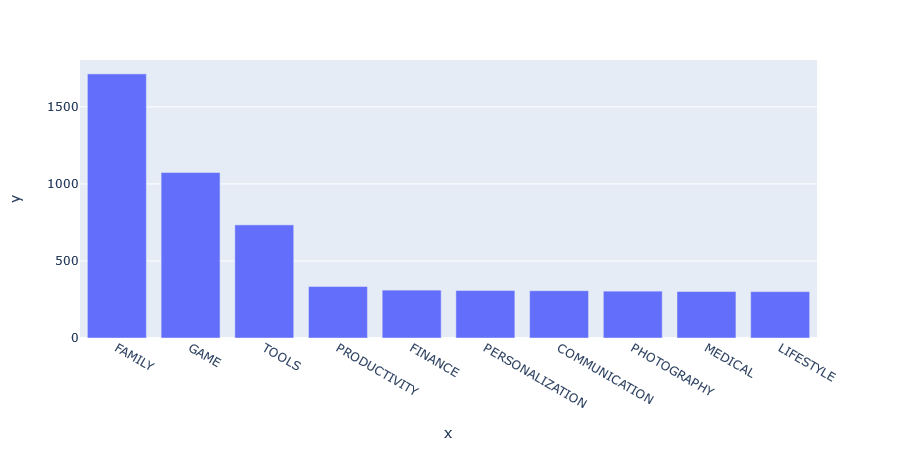

In [57]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)

bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [58]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

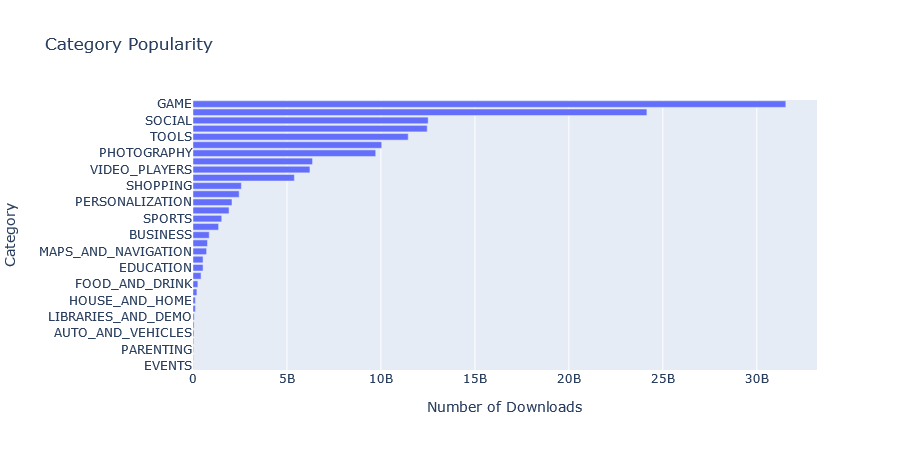

In [59]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

# Grouped Bar Charts: Free vs. Paid Apps per Category

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.